In [1]:
import functools
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns

from network import Net, NetDiscovery
from diff_equations import *

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
torch.manual_seed(42)

Dimensions of the time array
(2,)
Dimensions of the decay array
(2,)


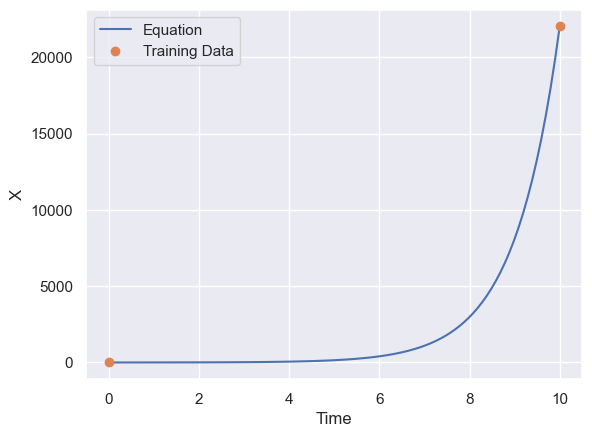

In [2]:
np.random.seed(10)

x0 = 1

times = np.linspace(0, 10, 100)
eq = functools.partial(exponential_decay, x0=x0)
decay = eq(times)

# Make Training data
t = np.linspace(0, 10, 2)
X = eq(t) + 0.05*np.random.randn(2)
print('Dimensions of the time array')
print(t.shape)
print('Dimensions of the decay array')
print(X.shape)

plt.plot(times, decay, label="Equation")
plt.plot(t, X, 'o', label="Training Data")
plt.ylabel('X')
plt.xlabel('Time')
plt.legend()

In [3]:
def decay_loss(model: torch.nn.Module):
  ts = torch.linspace(0, 10, steps=100, ).view(-1,1).requires_grad_(True).to(DEVICE)
  xs = model(ts)
  dX = grad(xs, ts)[0]
  pde = xs - dX
  return torch.mean(pde**2)



Epoch 0/10000, loss: 242585552.00
Epoch 1000/10000, loss: 79338864.00
Epoch 2000/10000, loss: 63949928.00
Epoch 3000/10000, loss: 31820236.00
Epoch 4000/10000, loss: 10068276.00
Epoch 5000/10000, loss: 2633993.50
Epoch 6000/10000, loss: 732273.56
Epoch 7000/10000, loss: 1045502.81
Epoch 8000/10000, loss: 261284.47
Epoch 9000/10000, loss: 280926.38


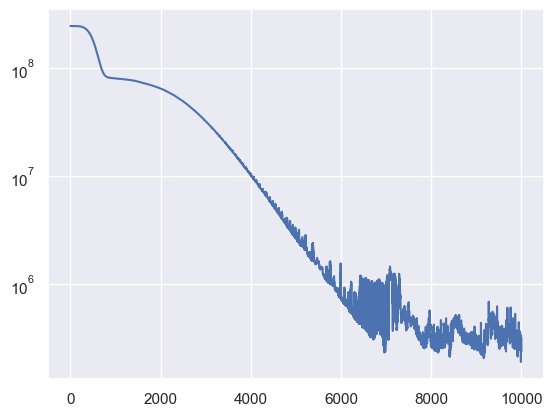

In [4]:
net = Net(1,1, loss2=decay_loss, epochs=10000, loss2_weight=1, lr=1e-4).to(DEVICE)

losses = net.fit(t, X)
plt.plot(losses)
plt.yscale('log')

Text(0.5, 0, 'Time (s)')

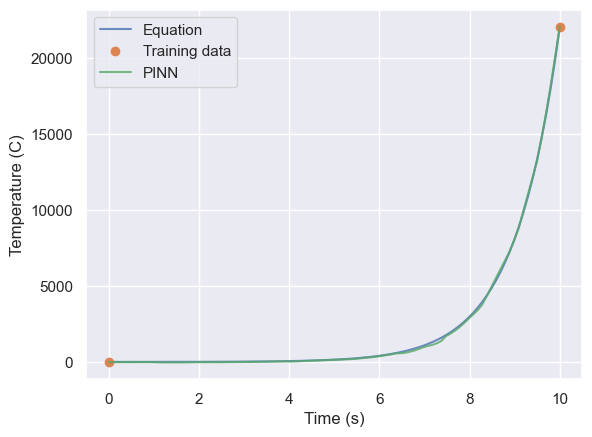

In [5]:
preds = net.predict(times)

plt.plot(times, decay, alpha=0.8)
plt.plot(t, X, 'o')
plt.plot(times, preds, alpha=0.8)
plt.legend(labels=['Equation','Training data', 'PINN'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')